In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

# sns.set(font_scale=1.6, palette='summer')
sns.set(font_scale=1.6, palette='Set2')


%matplotlib inline

import plotly
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression as skRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, mean_absolute_percentage_error as MAPE

In [55]:
df = pd.read_csv('ratio.txt', names=['greedy', 'jiang', 'optimal'])
df

,greedy,jiang,optimal
0,15,15,15
1,15,15,15
2,18,19,17
3,16,16,16
4,15,15,15
...,...,...,...
995,17,17,17
996,16,16,16
997,17,18,17
998,18,18,18


In [56]:
max(df['greedy'] / df['optimal']), max(df['jiang'] / df['optimal'])

(1.3333333333333333, 1.3076923076923077)

In [61]:
np.quantile(df['greedy'] / df['optimal'], 0.98), np.quantile(df['jiang'] / df['optimal'], 0.98)

(1.0769230769230769, 1.2)

In [62]:
np.quantile(df['greedy'] / df['optimal'], 0.95), np.quantile(df['jiang'] / df['optimal'], 0.95)

(1.0625, 1.125)

In [66]:
(df['greedy'] == df['optimal']).sum(), (df['jiang'] == df['optimal']).sum()

(924, 765)

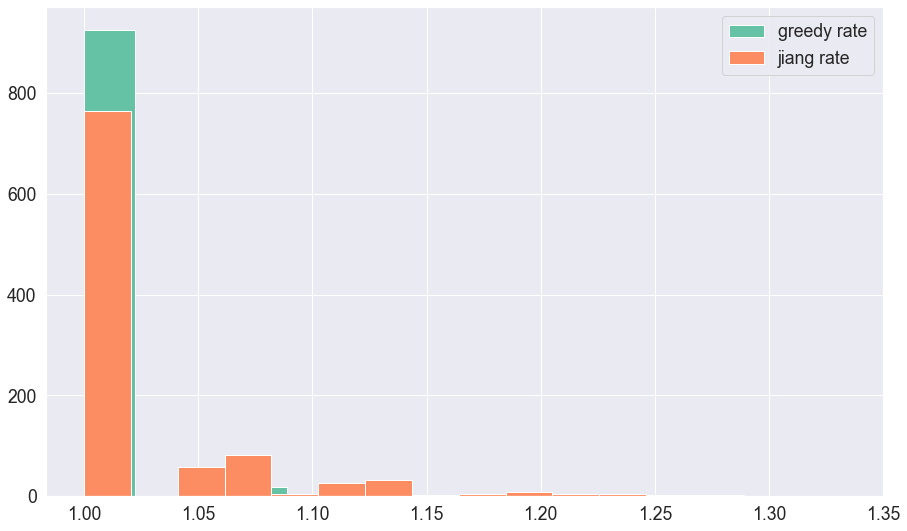

In [59]:
plt.figure(figsize=(15, 9))
plt.hist(df['greedy'] / df['optimal'], bins=15, label='greedy rate')
plt.hist(df['jiang'] / df['optimal'], bins=15, label='jiang rate')

plt.legend()
plt.show()

In [102]:
time = pd.read_csv('out.txt')
time.head()
time = time[time['start'] < 88000]

In [103]:
time.columns

Index(['start', ' jiang_res', ' greedy_res', ' jiang_time', ' greedy_time'], dtype='object')

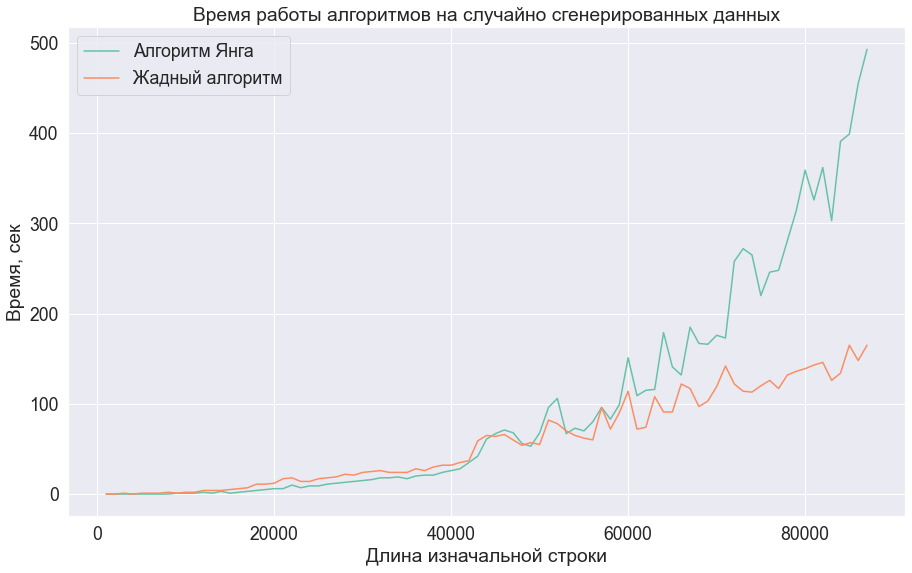

In [106]:
plt.figure(figsize=(15, 9))
plt.plot(time['start'], time[' jiang_time'], label='Алгоритм Янга')
plt.plot(time['start'], time[' greedy_time'], label='Жадный алгоритм')
plt.legend()
plt.ylabel('Время, сек')
plt.xlabel('Длина изначальной строки')
plt.title('Время работы алгоритмов на случайно сгенерированных данных')

plt.savefig('time.png')
plt.show()

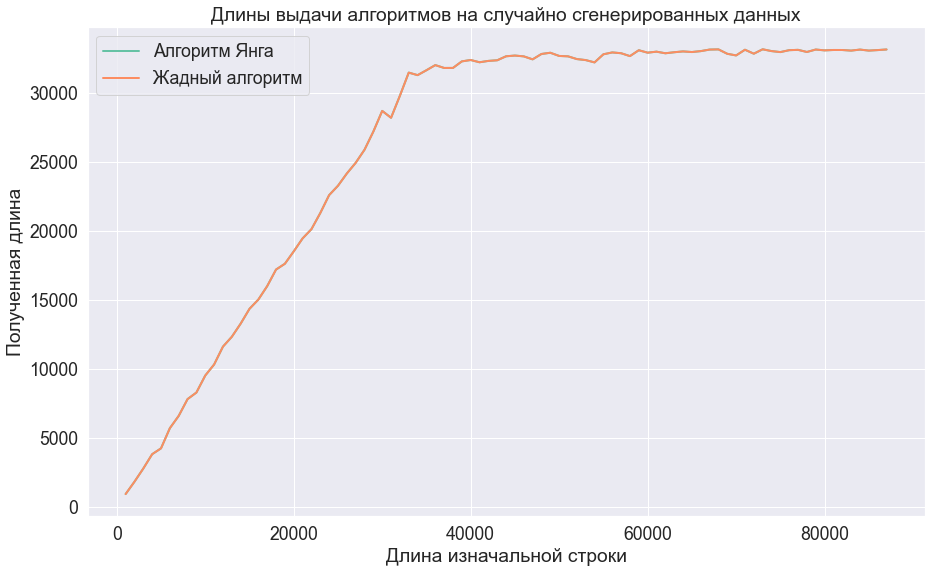

In [110]:
plt.figure(figsize=(15, 9))
plt.plot(time['start'], time[' jiang_res'], label='Алгоритм Янга', lw=2)
plt.plot(time['start'], time[' greedy_res'], label='Жадный алгоритм', lw=2)
plt.legend()
plt.ylabel('Полученная длина')
plt.xlabel('Длина изначальной строки')
plt.title('Длины выдачи алгоритмов на случайно сгенерированных данных')

plt.savefig('length.png')
plt.show()

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Длина изначальной строки')
ax1.set_ylabel('Время, сек', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()